In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
data = pd.read_csv('/content/data.csv')

In [3]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
data.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
data.shape

(4600, 18)

In [10]:
data.columns.tolist()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

In [11]:
data.drop('date', inplace=True , axis=1)

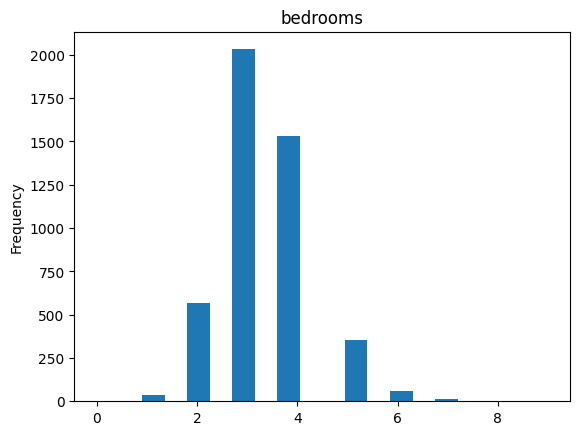

In [12]:
from matplotlib import pyplot as plt
data['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(True)

In [13]:
data.dropna()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [14]:
data['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [15]:
data['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [16]:
data['street'].value_counts()

street
2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: count, Length: 4525, dtype: int64

In [17]:
data['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [18]:
X = data.drop(['price','street','city','statezip','country'], axis=1)
Y = data['price']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [61]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1898,4.0,2.50,2770,45514,2.0,0,0,4,2770,0,1989,0
1370,4.0,3.00,3720,29043,2.0,0,0,3,3720,0,1991,0
3038,4.0,2.50,2810,11120,2.0,0,0,3,2810,0,1982,0
2361,4.0,3.75,4030,10800,2.0,0,0,3,4030,0,2006,0
156,3.0,2.00,2000,7000,2.0,0,0,3,2000,0,1916,1986
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3.0,1.00,1180,5002,1.5,0,0,3,1180,0,1946,0
466,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007
3092,3.0,1.00,1150,8145,1.0,0,0,4,990,160,1932,1958
3772,2.0,1.00,910,2002,1.5,0,0,3,910,0,1900,2005


In [62]:
y_train

1898    6.850000e+05
1370    8.570000e+05
3038    6.750000e+05
2361    1.485000e+06
156     5.610000e+05
            ...     
4426    2.825089e+05
466     8.750000e+05
3092    2.900000e+05
3772    6.000000e+05
860     4.750000e+05
Name: price, Length: 3680, dtype: float64

In [63]:
train_data = X_train.join(y_train)

In [64]:
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
1898,4.0,2.50,2770,45514,2.0,0,0,4,2770,0,1989,0,6.850000e+05
1370,4.0,3.00,3720,29043,2.0,0,0,3,3720,0,1991,0,8.570000e+05
3038,4.0,2.50,2810,11120,2.0,0,0,3,2810,0,1982,0,6.750000e+05
2361,4.0,3.75,4030,10800,2.0,0,0,3,4030,0,2006,0,1.485000e+06
156,3.0,2.00,2000,7000,2.0,0,0,3,2000,0,1916,1986,5.610000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3.0,1.00,1180,5002,1.5,0,0,3,1180,0,1946,0,2.825089e+05
466,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,8.750000e+05
3092,3.0,1.00,1150,8145,1.0,0,0,4,990,160,1932,1958,2.900000e+05
3772,2.0,1.00,910,2002,1.5,0,0,3,910,0,1900,2005,6.000000e+05


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

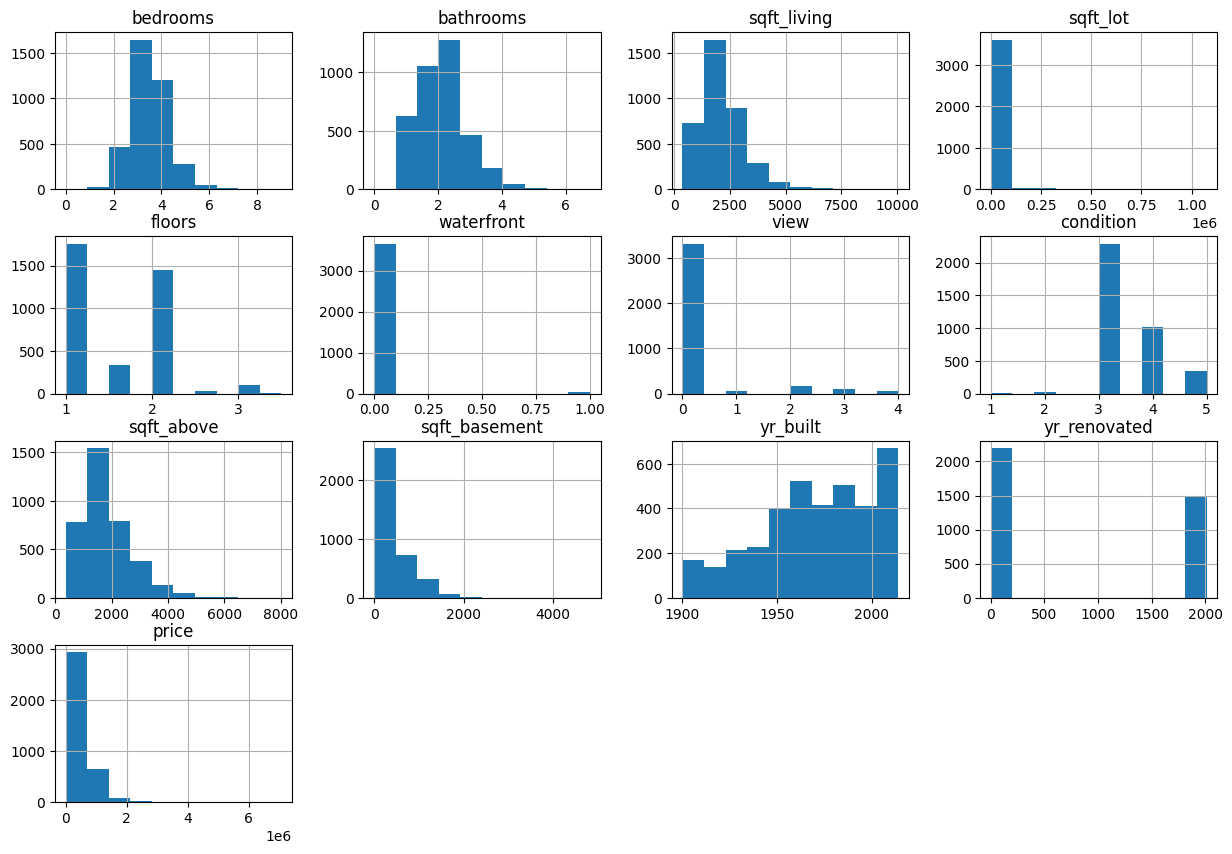

In [65]:
train_data.hist(figsize=(15,10))

<Axes: >

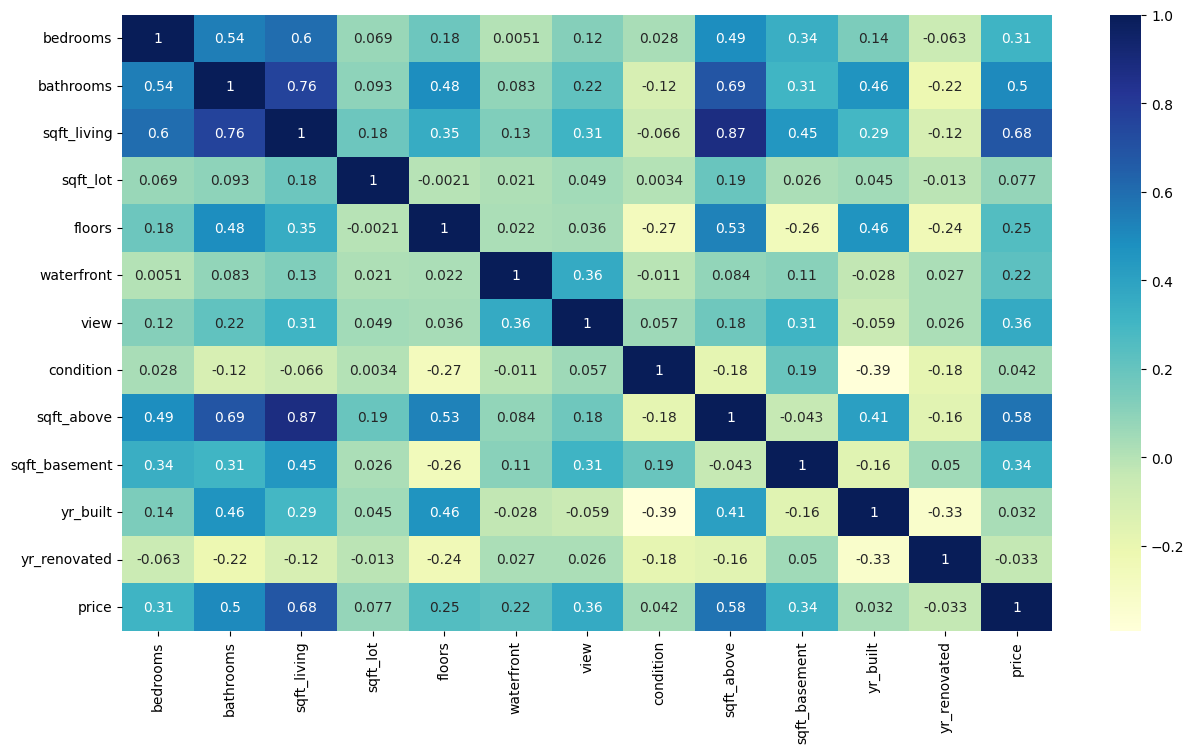

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [67]:
train_data['sqft_living'] = np.sqrt(train_data['sqft_living']+1)
train_data['sqft_basement'] = np.sqrt(train_data['sqft_basement']+1)
train_data['sqft_above'] = np.sqrt(train_data['sqft_above']+1)
train_data['waterfront'] = np.sqrt(train_data['waterfront']+1)

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

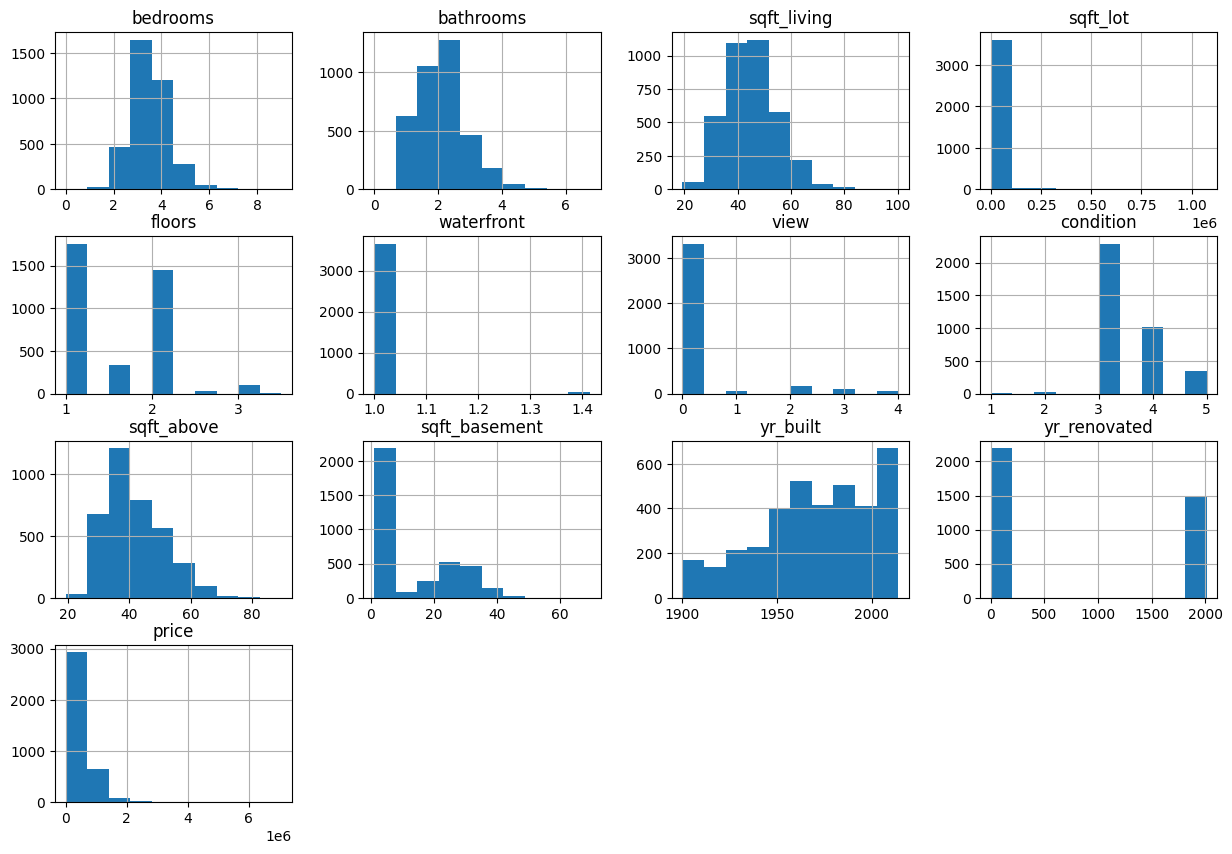

In [68]:
train_data.hist(figsize=(15,10))

<ipython-input-69-2ba2390de374>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='sqft_living', y='sqft_basement',palette = 'coolwarm', data=train_data)


<Axes: xlabel='sqft_living', ylabel='sqft_basement'>

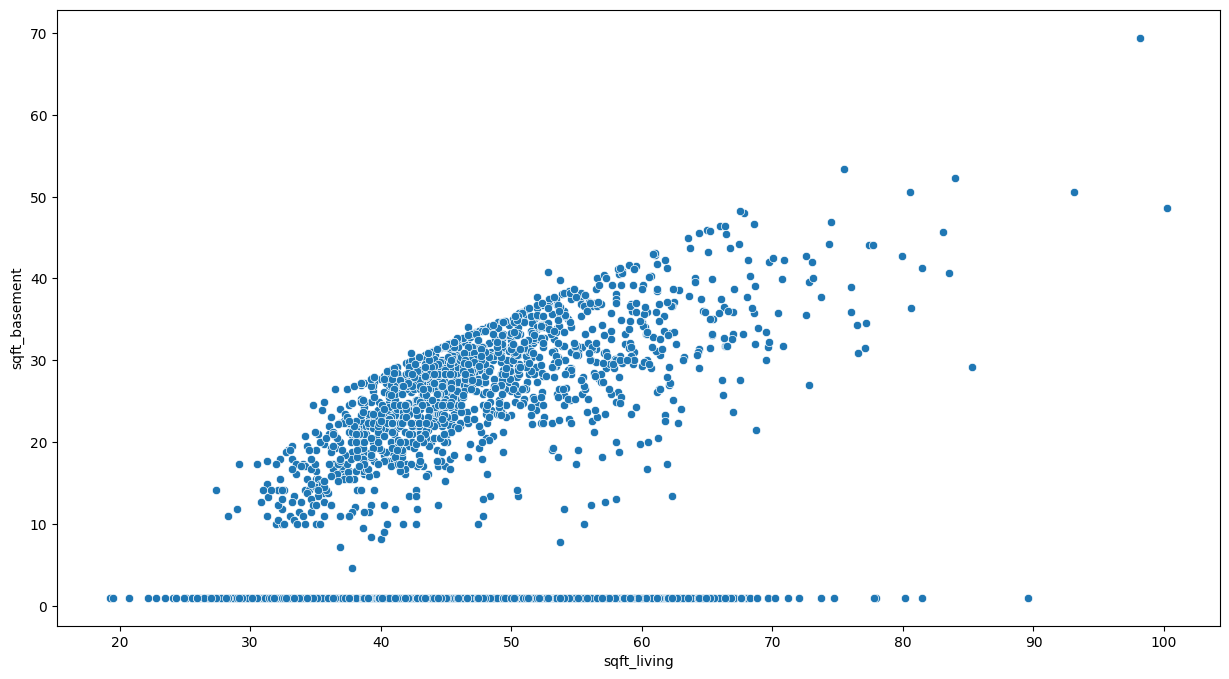

In [69]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='sqft_living', y='sqft_basement',palette = 'coolwarm', data=train_data)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train,y_train = train_data.drop('price', axis=1), train_data['price']
X_train_s = scaler.fit_transform(X_train)

# model 1
model1 = LinearRegression()
model1.fit(X_train_s, y_train)

LinearRegression()

In [73]:
test_data = X_test.join(y_test)

test_data['sqft_living'] = np.log(test_data['sqft_living'] + 1)
test_data['sqft_basement'] = np.log(test_data['sqft_basement'] + 1)
test_data['sqft_above'] = np.log(test_data['sqft_above'] + 1)
test_data['waterfront'] = np.log(test_data['waterfront'] + 1)

X_test,y_test = test_data.drop('price', axis=1), test_data['price']

In [74]:
test_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
3683,3.0,2.50,1.136124,1613,2.0,0.0,0,3,1.127738,1.062247,2007,0,544000.0
4411,5.0,2.25,1.148013,7900,1.0,0.0,0,4,1.131588,1.105879,1986,0,0.0
2584,3.0,3.25,1.161814,5432,3.0,0.0,3,4,1.155235,1.090709,1978,2000,1712500.0
69,3.0,2.50,1.151502,7350,1.0,0.0,0,5,1.138920,1.101226,1988,0,365000.0
1844,3.0,2.50,1.142388,8755,1.0,0.0,0,3,1.121016,1.107109,1983,2009,275000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,3.0,1.75,1.141946,8400,1.0,0.0,0,3,1.136124,1.054124,1947,2012,750000.0
1068,5.0,2.00,1.146696,6120,1.5,0.0,0,3,1.146696,0.000000,1941,1969,230000.0
4350,3.0,2.00,1.127738,7793,1.0,0.0,0,4,1.127738,0.000000,1992,0,26590000.0
3027,4.0,2.50,1.154192,10083,2.0,0.0,0,5,1.154192,0.000000,1966,0,687000.0


In [75]:
X_test_s = scaler.transform(X_test)

In [76]:
model1.score(X_test_s, y_test)

-5.052895586819106

In [86]:
y_pred1 = model1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [87]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [88]:
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
mape = mean_absolute_percentage_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

In [89]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute error: {mae}')
print(f'Mean absolute percentage error: {mape}')
print(f'R-squared: {r2}')

Mean Squared Error: 5.188767769093801e+17
Mean Absolute error: 404807007.4542821
Mean absolute percentage error: 1.7522190012166613e+22
R-squared: -508778.36853226274


In [90]:
# Model 2
model2 = DecisionTreeRegressor()
model2.fit(X_train_s, y_train)

DecisionTreeRegressor()

In [91]:
model2.score(X_test_s,y_test)

-0.05861422099374036

In [92]:
y_pred2 = model2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [93]:
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
mape = mean_absolute_percentage_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

In [94]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute error: {mae}')
print(f'Mean absolute percentage error: {mape}')
print(f'R-squared: {r2}')

Mean Squared Error: 1062632754335.0536
Mean Absolute error: 309297.2560576261
Mean absolute percentage error: 2.5577508753272656e+19
R-squared: -0.041953785159880796


In [96]:
#Model 3
model3 = RandomForestRegressor()
model3.fit(X_train_s, y_train)

RandomForestRegressor()

In [97]:
model3.score(X_test_s,y_test)

-0.0954437891818336

In [98]:
y_pred3 = model3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [101]:
mse = mean_squared_error(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
mape = mean_absolute_percentage_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

In [102]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute error: {mae}')
print(f'Mean absolute percentage error: {mape}')
print(f'R-squared: {r2}')

Mean Squared Error: 1037737929087.4852
Mean Absolute error: 356654.5246141113
Mean absolute percentage error: 3.259169594525099e+19
R-squared: -0.017543416392517663


In [104]:
#Model4

model4 = GradientBoostingRegressor()
model4.fit(X_train, y_train)

GradientBoostingRegressor()

In [105]:
model4.score(X_test,y_test)

-0.09069910626912758

In [106]:
y_pred4 = model4.predict(X_test)

In [107]:
mse = mean_squared_error(y_test, y_pred4)
mae = mean_absolute_error(y_test, y_pred4)
mape = mean_absolute_percentage_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

In [108]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute error: {mae}')
print(f'Mean absolute percentage error: {mape}')
print(f'R-squared: {r2}')

Mean Squared Error: 1112345491664.6821
Mean Absolute error: 321468.1176738064
Mean absolute percentage error: 1.0150012283583283e+19
R-squared: -0.09069910626912758


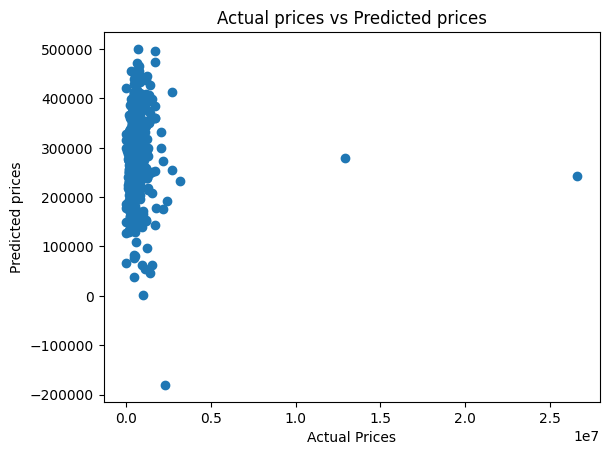

In [115]:
plt.scatter (y_test, y_pred4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [ ]:
`